 #  Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

mice_df = merged_df["Mouse ID"].value_counts()
total_mice_df = len(mice_df)
total_mice_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_id = merged_df[merged_df["Mouse ID"]=="g989"]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merged_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mice_df)==False]
clean_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
 # Checking the number of mice in the clean DataFrame.

clean_mice_df = clean_merged_df["Mouse ID"].value_counts()
total_mice_df2 =len(clean_mice_df)
total_mice_df2

248

##  Summary Statistics

In [7]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# This method is the most straighforward, creating multiple series and putting them all together at the end.

means = merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

statistics1 = pd.DataFrame(means)
statistics_summary1 = statistics1.rename(columns={"Tumor Volume (mm3)": "Mean"})

statistics_summary1["Median"] = medians
statistics_summary1["Variance"] = variances
statistics_summary1["std"] = standards
statistics_summary1["sem"] = sems

statistics_summary1

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# This method produces everything in a single groupby function

statistics2 = merged_df.groupby('Drug Regimen')
statistics_summary2 = statistics2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statistics_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


##  Bar and Pie Charts

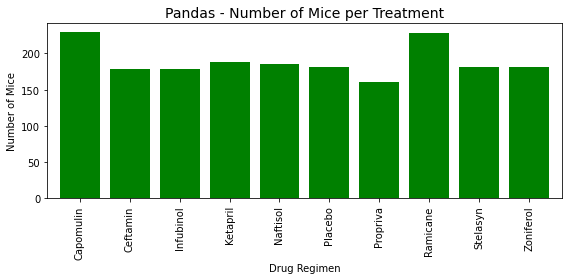

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

mice_treatment_df = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mice_treatment_df.plot.bar(figsize =(8,4), color ='g',fontsize =10, width =0.8)
mice_treatment_df

plt.title("Pandas - Number of Mice per Treatment",fontsize =14)
plt.xlabel("Drug Regimen",fontsize =10)
plt.ylabel("Number of Mice",fontsize =10)
plt.tight_layout()

plt.savefig("../Images/Pandas_Mice_per_Treatmeant.png", bbox_inches = "tight")
plt.show()

In [10]:
# Create an array for the number of mice per drug regimen

mice_array = (merged_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_array

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

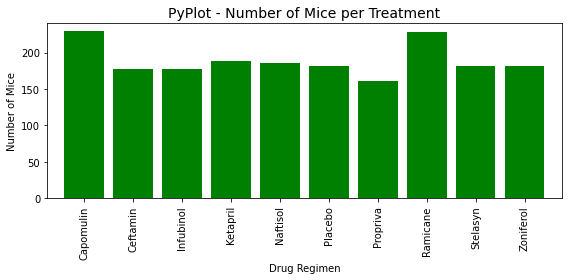

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_treatment_df))
fig1, ax1 = plt.subplots(figsize =(8,4))
plt.bar(x_axis, mice_array, color ='g', align ='center', width =0.8)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_array)+10)

plt.title("PyPlot - Number of Mice per Treatment",fontsize =14)
plt.xlabel("Drug Regimen",fontsize =10)
plt.ylabel("Number of Mice",fontsize =10)
plt.tight_layout()

plt.savefig("../Images/PyPlot_Mice_per_Treatment.png", bbox_inches = "tight")
plt.show()

In [12]:
# Create a dataframe which groups the mice by sex

gender_grouped = merged_df.groupby(["Mouse ID","Sex"])

gender_df = pd.DataFrame(gender_grouped.size())
gender_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [13]:
# Count total male and female mice in dataframe

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# Calculate the percentage of male vs female
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

# Calculate the "Percentage of Sex" column
mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]
mice_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


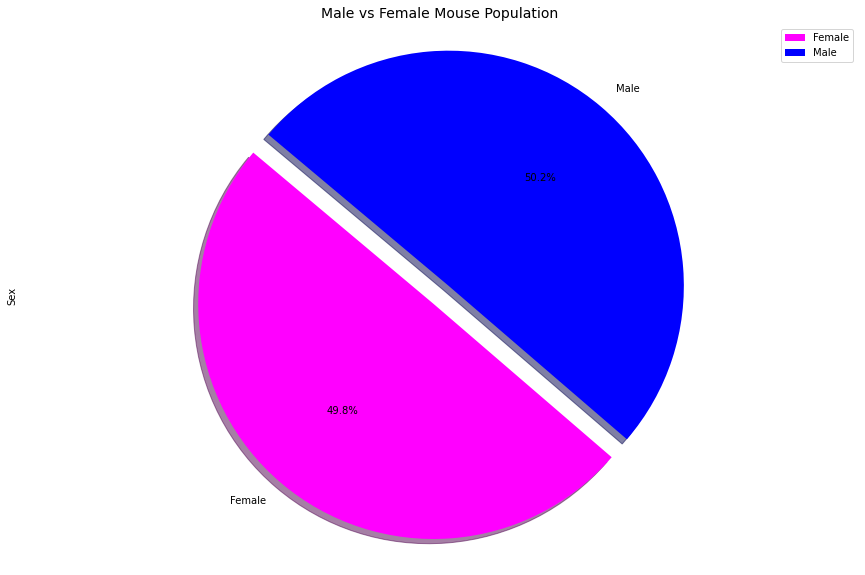

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['magenta', 'blue']
explode = (0, 0.1)
plot = mice_gender.plot.pie(y='Total Count',figsize=(15,10),colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('Sex',fontsize = 10)
plt.axis("equal")

plt.savefig("../Images/Pandas_PieChart.png", bbox_inches = "tight")
plt.show()

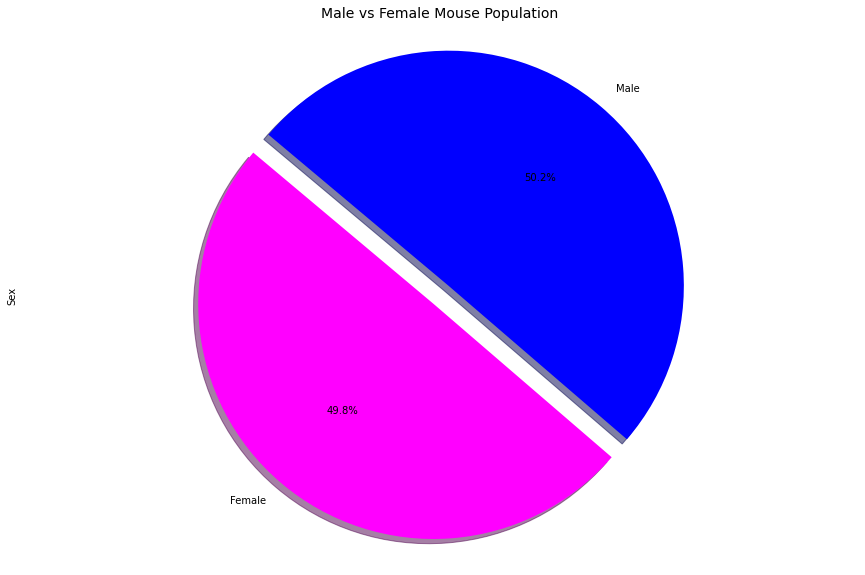

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
colors = ['magenta', 'blue']
sizes = [49.799197,50.200803]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, startangle=140, autopct="%1.1f%%", shadow=True)
plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('Sex',fontsize = 10)
plt.axis("equal")

plt.savefig("../Images/PyPlot_PieChart.png", bbox_inches = "tight")
plt.show()

##   Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
tumor_vol = clean_merged_df.groupby(["Drug Regimen"]).sum()["Tumor Volume (mm3)"]

# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_merged_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_df = greatest_timepoint.reset_index()
                                                                  
final_merged_mouse_df = greatest_timepoint_df.merge(clean_merged_df, on=["Mouse ID","Timepoint"], how="left")
final_merged_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

for regimen in regimens:
    volume = final_merged_mouse_df["Drug Regimen"] == regimen
    volume_data = final_merged_mouse_df.loc[volume, "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = volume_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    tumor_vol_list.append(volume_data)

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = volume_data.loc[(volume_data < lower_bound) | (volume_data > upper_bound)]
    print(f"{regimen} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


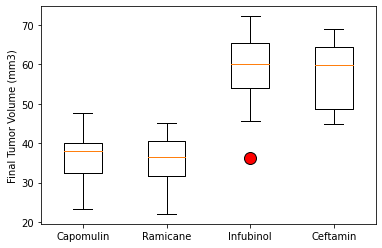

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_format = dict(markerfacecolor = "r", markersize = 12)
plt.boxplot(tumor_vol_list, labels = regimens, flierprops = box_format)
plt.ylabel("Final Tumor Volume (mm3)")

plt.savefig("../Images/BoxPlot_Final_Tumor_Volume_Per_Regimen.png",bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [19]:
# Create Capomulin dataframe

capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [20]:
# Select Mouse ID from one Mouse treated with Capomulin

capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
capomulin_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
47,472,b128,5,45.651331,0,Capomulin,Female,9,22
70,679,b128,10,43.270852,0,Capomulin,Female,9,22
76,719,b128,15,43.784893,0,Capomulin,Female,9,22
101,933,b128,20,42.731552,0,Capomulin,Female,9,22
139,1268,b128,25,43.262145,1,Capomulin,Female,9,22
157,1400,b128,30,40.605335,1,Capomulin,Female,9,22
177,1547,b128,35,37.967644,1,Capomulin,Female,9,22
188,1629,b128,40,38.379726,2,Capomulin,Female,9,22
209,1764,b128,45,38.982878,2,Capomulin,Female,9,22


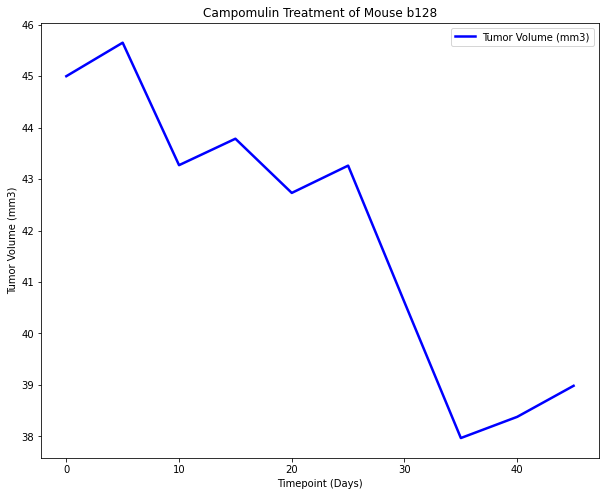

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8),linewidth=2.5, color="blue")
plt.title("Campomulin Treatment of Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")

plt.savefig("../Images/LinePlot_TimePoint_V_TumorVolume_Capomulin.png",bbox_inches = "tight")
plt.show()

In [22]:
# Create dataframe to capture the Mouse ID, Weight and Tumor Volume for mouse treated with Capomulin

capomulin_weight_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_weight_df.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.0
1,j246,21,45.0
2,r554,17,45.0
3,s185,17,45.0
4,b742,21,45.0


In [23]:
# Calculate Capomulin Average Tumor Volume (mm3)

capomulin_average_df = pd.DataFrame(capomulin_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_average_df = capomulin_average_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_average_df.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


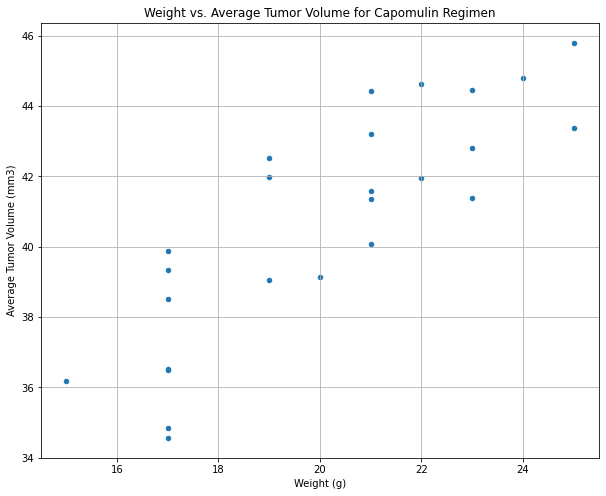

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_average_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(10,8), title="Weight vs. Average Tumor Volume for Capomulin Regimen")

plt.savefig("../Images/ScatterPlot_MouseWeight_V_TumorVolume_Capomulin.png",bbox_inches = "tight")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


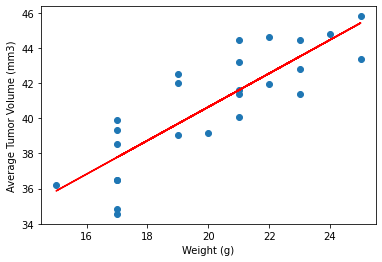

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = capomulin_average_df.iloc[:,1]
average_tumor_volume = capomulin_average_df.iloc[:,2]
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_average_df["Weight (g)"]
y_values = capomulin_average_df["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("../Images/Linear_Regression_Model_Capomulin.png",bbox_inches = "tight")
plt.show()

##  Observation Summary

1. Drug regimen Capomulin has the highest number of mice (230), while Propriva has the least number of mice (161).

2. A total of 124 female mice and 125 male mice were included in the total count of mice by gender with the total number of mice after duplicates were removed totalling 248 mice.

3. The average tumour volume and mouse weight have a correlation of 0.84. It's a good positive correlation. As the weight of the mouse increases, so does the average tumour volume.

4. Regression analysis was applied to figure out how much the average tumour volume (dependent variable) would change as the weight of the mice changes (independent variables). The R-squared value is 0.70, indicating that the model fits the data 70% of the time, which is a strong indicator of the model's ability to predict data. Smaller variations between the observed data and the fitted value are represented by higher R-squared values 70% of the time.